 <img src='technohacks_logo.jpg' align='left'>
 <h1> TechnoHacks : Data Analytics Internship Tasks </h1>

<h3> Task 1 : Perform Data Cleaning  </h3>
<h3> Task 2 : Calculate Summary Statistics  </h3>

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Collecting data
# The data is seprated into 3 files (train , test , gender_submission) we need to merge them together

# Reading Data
train=pd.read_csv('train.csv')                        # First Data
test=pd.read_csv('test.csv')                          # Second data
test_survived=pd.read_csv('gender_submission.csv')    # Remaining columns of second data (Survived column)

In [3]:
# Showing first 5 rows of the first data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# information of first data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checck for null values in first data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Showing first 5 rows of the Second data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Showing first 5 rows of the third data (Remaining of second data)
test_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
# merge second data with third data based on PassengerId
test2=pd.merge(test,test_survived,on='PassengerId')
test2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [9]:
# Rearrange columns in the same sort of first data
test2=test2.reindex(train.columns,axis=1)

In [10]:
test2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# Informations about second data
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [12]:
# check for null values in second data
test2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# First way to concat first and second datasets together in one data
#df=pd.concat([train,test2],ignore_index=True)

In [14]:
# The second way to concat first and second data
df=train.append(test2,ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
# Check for null values in data
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

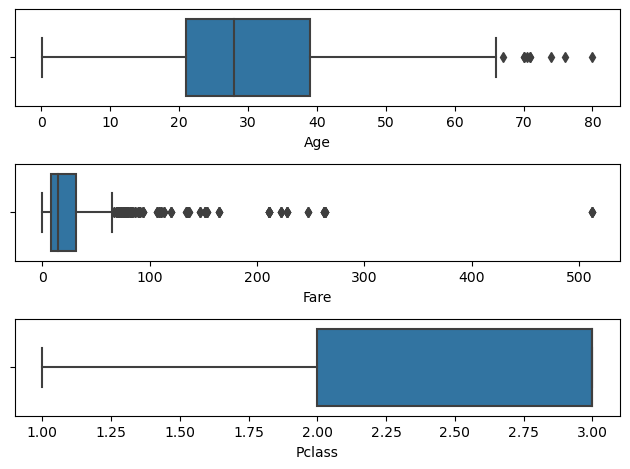

In [16]:
# figure out outliers
fig, axs = plt.subplots(3)
plt1 = sns.boxplot(x=df.Age, ax = axs[0])
plt2 = sns.boxplot(x=df.Fare, ax = axs[1])
plt3 = sns.boxplot(x=df.Pclass, ax = axs[2])
plt.tight_layout()

In [17]:
# Viewing data of null values of Age
df[df.Age.isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
# mean of ages for 1st class
round(df.Age[df.Pclass==1].mean(),1)

39.2

In [19]:
# mean of ages for 2nd class
round(df.Age[df.Pclass==2].mean(),1)

29.5

In [20]:
# mean of ages for 3rd class
round(df.Age[df.Pclass==3].mean(),1)

24.8

In [21]:
# replacing null values of Age depending on the mean Age for each pclass
# that's better than replace it with the mean of all the data values
df.Age[df.Pclass==3]=df.Age[df.Pclass==3].fillna(value=round(df.Age[df.Pclass==1].mean(),1))
df.Age[df.Pclass==2]=df.Age[df.Pclass==2].fillna(value=round(df.Age[df.Pclass==2].mean(),1))
df.Age[df.Pclass==1]=df.Age[df.Pclass==1].fillna(value=round(df.Age[df.Pclass==1].mean(),1))

In [22]:
# Check for null values 
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

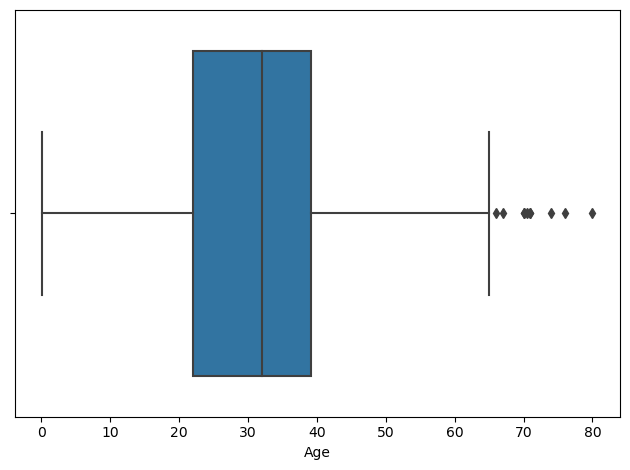

In [23]:
# Outliers in Age
sns.boxplot(df.Age)
plt.tight_layout()

In [24]:
# Figure to show Outliers , IQR , Lower Fence , Upper Fence

 <img src='interquartile-range.png' width=400>

In [25]:
# define the IQR , Upper Fence , Lower Fence
for x in ['Age']:
    q1,q3 = np.percentile(df.loc[:,x],[25,75])
    intr_qr = q3-q1
 
    UpperFence = q3+(1.5*intr_qr)
    LowerFence = q1-(1.5*intr_qr)
    
# Maximum boundary , so all values greater than it is outlier
print(f'The maximum boundary: {UpperFence}')

# Minimum boundary , so all values less than it is outlier
print(f'The minimum boundary: {LowerFence}')

The maximum boundary: 65.0
The minimum boundary: -3.8000000000000043


In [26]:
# Show outliers data
df[(df.Age>UpperFence)|(df.Age<LowerFence)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
972,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
987,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [27]:
# Number of outliers
(f'The number of outliers is: {df[(df.Age>UpperFence)|(df.Age<LowerFence)].shape[0]} outliers , and the dataset is: {df.shape[0]}')

'The number of outliers is: 10 outliers , and the dataset is: 1309'

In [28]:
# we can remove them or replace them with another value like mean or median or the (Upper Fence , Lower Fence )
# The number of outliers is 10 from 1309 , so we can remove them

In [29]:
# Incase we want to replce outliers with upperfence , only remove '#' from the below  line
# df.Age.loc[df.Age>UpperFence]=UpperFence

In [30]:
# Drop outliers and reset index of data after drop outliers
df=df.drop(df[(df.Age>UpperFence)|(df.Age<LowerFence)].index).reset_index(drop=True)

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,0,3,"Spector, Mr. Woolf",male,39.2,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1296,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,0,3,"Ware, Mr. Frederick",male,39.2,0,0,359309,8.0500,NaN,S


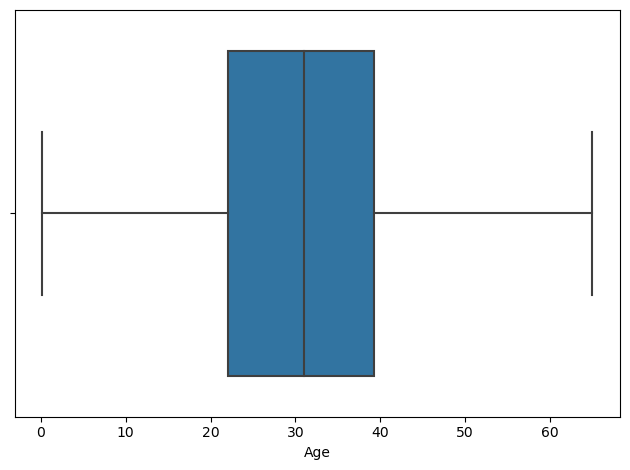

In [32]:
sns.boxplot(df.Age)
plt.tight_layout()

In [33]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     1299 non-null   int64  
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   object 
 5   Age          1299 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Ticket       1299 non-null   object 
 9   Fare         1298 non-null   float64
 10  Cabin        290 non-null    object 
 11  Embarked     1297 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 121.9+ KB


In [34]:
# Summary statistics (Task 2)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1298.000000
mean,655.727483,0.378753,2.300231,31.327614,0.500385,0.387221,33.149595
std,378.178924,0.485263,0.835882,12.968895,1.044742,0.868126,51.647725
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,31.000000,0.000000,0.000000,14.454200
75%,983.500000,1.000000,3.000000,39.200000,1.000000,0.000000,31.206250
max,1309.000000,1.000000,3.000000,65.000000,8.000000,9.000000,512.329200


In [35]:
# number of survived and dead people
df.Survived.value_counts()

0    807
1    492
Name: Survived, dtype: int64

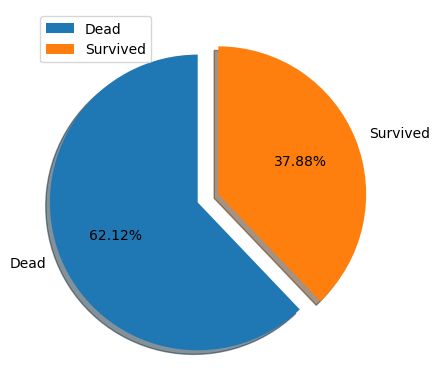

In [36]:
# Percentage of Survived people VS deathes
plt.pie(df.Survived.value_counts(),labels=df.Survived.value_counts().index.map({0:'Dead',1:'Survived'}),
        autopct='%1.2f%%',explode=(0.15,0),startangle=90,shadow=True)
plt.legend()
plt.show()

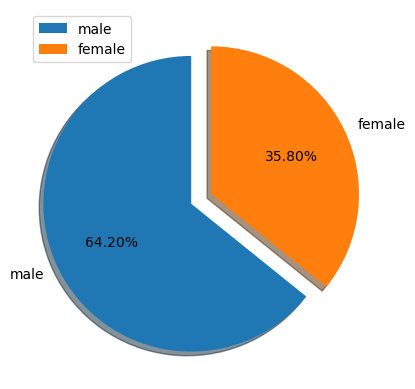

In [37]:
# Percentage of females on titanic VS males
plt.pie(df.Sex.value_counts(),labels=df.Sex.value_counts().index,
        autopct='%1.2f%%',explode=(0.15,0),startangle=90,shadow=True)
plt.legend()
plt.show()

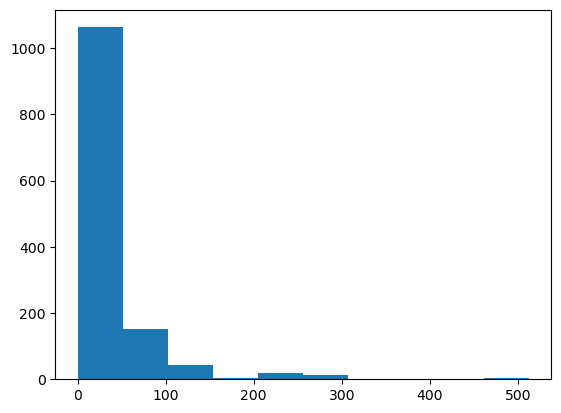

In [38]:
plt.hist(df.Fare)
plt.show()